In [67]:
import numpy as np
import pandas as pd
import glob
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import entropy
from scipy.optimize import curve_fit
import datetime
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic' # 폰트설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [68]:
os.chdir(r'C:\Users\pjk98\Data\New_Folder\CMPS_20230531')
file_list = glob.glob("./*.csv", recursive=True)

In [69]:
df = pd.read_csv(file_list[0], sep=',',header=0)
df

,Unnamed: 0,Time,External Sound,Ambient Temp.,Target Temp.
0,3,2023-05-31 20:54:00,558,30.29,29.69
1,4,2023-05-31 20:54:00,478,30.29,29.69
2,5,2023-05-31 20:54:00,363,30.29,29.69
3,6,2023-05-31 20:54:00,401,30.29,29.69
4,7,2023-05-31 20:54:00,629,30.29,29.69
...,...,...,...,...,...
601,607,2023-05-31 20:54:00,597,30.39,29.75
602,608,2023-05-31 20:54:00,372,30.39,29.75
603,609,2023-05-31 20:54:00,561,30.39,29.75
604,610,2023-05-31 20:54:00,366,30.39,29.75


In [70]:
drop_columns=['Unnamed: 0', 'Time','Ambient Temp.', 'Target Temp.']
df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거
df

,External Sound
0,558
1,478
2,363
3,401
4,629
...,...
601,597
602,372
603,561
604,366


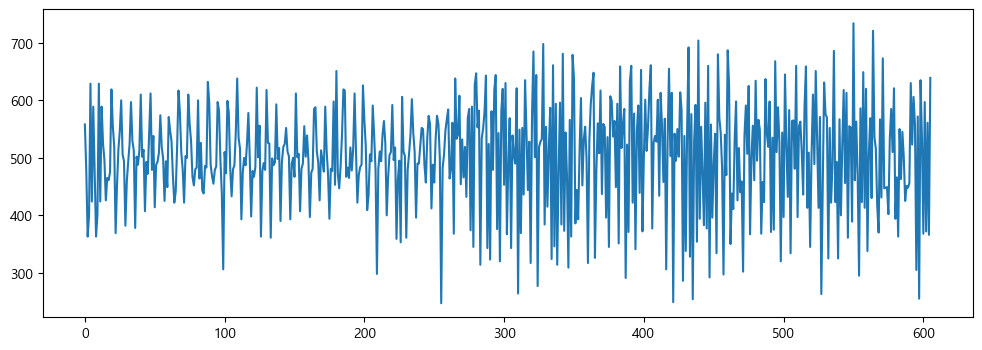

In [71]:
plt.figure(figsize=(12,4))
plt.plot(df['External Sound'])
plt.show()

In [72]:
def rms(stats):
    return(np.sqrt(np.mean(stats**2, axis=0)))
rms(df)
print(type(rms(df)))

<class 'pandas.core.series.Series'>


In [73]:
# 빈 데이터프레임 생성
time_df = pd.DataFrame()

# 파일 순회
for file in file_list:
    # CSV 파일 읽기
    df = pd.read_csv(file)
    
    # 'Time' 컬럼이 존재하는지 확인
    if 'Time' in df.columns:
        # 첫 번째 'Time' 컬럼 값만 선택하여 데이터프레임에 추가
        time_value = df['Time'].iloc[0]
        df = pd.DataFrame({'Time': [time_value]})
        time_df = pd.concat([time_df, df], ignore_index=True)

# 결과 출력
time_df

,Time
0,2023-05-31 20:54:00
1,2023-05-31 20:54:01
2,2023-05-31 20:54:02
3,2023-05-31 20:54:03
4,2023-05-31 20:54:04
...,...
3536,2023-05-31 21:53:55
3537,2023-05-31 21:53:56
3538,2023-05-31 21:53:57
3539,2023-05-31 21:53:58


In [74]:
def calculate_peak(stats):
    return np.array([np.max(stats)])
def rms(stats):
    return(np.sqrt(np.mean(stats**2, axis=0)))


rms_arr = np.array([])
peak_arr = np.array([])

for file in file_list:
    # 데이터 파일 읽기
    df = pd.read_csv(file, sep=',', header=0)
    drop_columns = ['Unnamed: 0', 'Time', 'Ambient Temp.', 'Target Temp.']  # 신호처리할 필요 없는 컬럼
    df.drop(labels=drop_columns, axis=1, inplace=True)  # 불필요한 컬럼 제거
    
    # value 추출
    rms_value = rms(df.values)
    peak = calculate_peak(df.values)
    
    rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
    peak_arr = np.concatenate([peak_arr, peak], axis=0)
rms_arr = rms_arr.reshape(len(file_list), 1)
peak_arr = peak_arr.reshape(len(file_list), 1)

Ex_RMS_df = pd.DataFrame(rms_arr, columns=['External Sound'])
Ex_PEAK_df = pd.DataFrame(peak_arr, columns=['External Sound'])
Ex_RMS_df['type'] = 'CMPS'
Ex_RMS_df['Time'] = time_df
Ex_PEAK_df['type'] = 'CMPS'
Ex_PEAK_df['Time'] = time_df
new_order = ['Time', 'External Sound', 'type']
Ex_RMS_df = Ex_RMS_df.reindex(columns=new_order)
Ex_PEAK_df = Ex_RMS_df.reindex(columns=new_order)
Ex_RMS_df['Time'] = pd.to_datetime(Ex_RMS_df['Time'])
Ex_PEAK_df['Time'] = pd.to_datetime(Ex_RMS_df['Time'])
Ex_PEAK_df.info()
# 59초(1분)동안 데이터 손실

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541 entries, 0 to 3540
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3541 non-null   datetime64[ns]
 1   External Sound  3541 non-null   float64       
 2   type            3541 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 83.1+ KB


In [75]:
Ex_PEAK_df

,Time,External Sound,type
0,2023-05-31 20:54:00,510.373508,CMPS
1,2023-05-31 20:54:01,513.408642,CMPS
2,2023-05-31 20:54:02,515.211793,CMPS
3,2023-05-31 20:54:03,515.737908,CMPS
4,2023-05-31 20:54:04,509.648786,CMPS
...,...,...,...
3536,2023-05-31 21:53:55,517.911070,CMPS
3537,2023-05-31 21:53:56,521.914245,CMPS
3538,2023-05-31 21:53:57,516.088639,CMPS
3539,2023-05-31 21:53:58,519.356913,CMPS


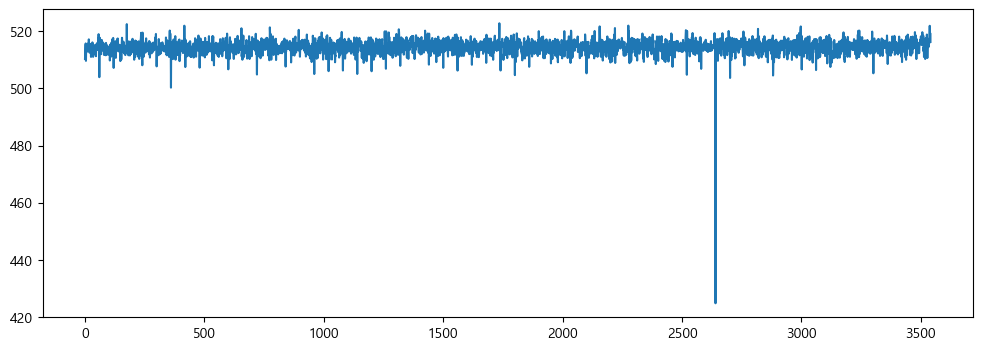

In [76]:
# CMPS External Sound
plt.figure(figsize=(12,4))
plt.plot(Ex_PEAK_df['External Sound'])
plt.show()

In [77]:
# JS, CMPS, SSJD, SSNC. 결측치 및 이상 데이터를 포함하는 행을 제외한 Internal Sound 열
# faulttypelist = ['CMPS', 'JS', 'SSJD', 'SSNC']
# for j in faulttypelist:

def rms(stats):
    return np.array([(np.sqrt(np.mean(stats**2, axis=0)))])

j = 'CMPS'
os.chdir("C:\\Users\\pjk98\Data\\BeltforSharing\\Belt_"+j)
filelist = glob.glob('**/*.txt', recursive=True)

rms_arr = np.array([])
std_arr = np.array([]) 

time_df = pd.DataFrame()
for i in range(len(filelist)):
    currentfile = datetime.datetime(2023, int(filelist[i][:2]), int(filelist[i][3:5]), int(filelist[i][6:8]), int(filelist[i][9:11]), int(filelist[i][12:14]))
    with open(filelist[i], 'r') as file:
        data = []
        for line in file:
            values = line.strip().split(',')
            if len(values) == 3:
                data.append(values)
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")] = pd.DataFrame(data, columns=['Internal Sound', 'Ambient Temp.', 'Target Temp.']) # 동적 변수 생성
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Internal Sound'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Internal Sound'].astype(int)
        # globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Ambient Temp.'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Ambient Temp.'].astype(float) # 온도 데이터 필요할 때 살리세요.
        # globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Target Temp.'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Target Temp.'].astype(float)
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")] = pd.DataFrame(globals()['A_'+currentfile.strftime("%m%d_%H%M%S")].loc[:, 'Internal Sound']) # 온도 데이터 필요할 때 죽이세요.
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'] = currentfile # Time 열 추가. 모든 행이 같은 시각.
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'] = pd.to_datetime(globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'])
        df = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]
        
        # rms value 추출
        rms_value = rms(df['Internal Sound'].values)
        std = np.array([(df['Internal Sound'].values).std()])
        rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
        std_arr = np.concatenate([std_arr, std], axis=0)
    
    if 'Time' in df.columns:
        # 첫 번째 'Time' 컬럼 값만 선택하여 데이터프레임에 추가
        time_value = df['Time'].iloc[0]
        df = pd.DataFrame({'Time': [time_value]})
        time_df = pd.concat([time_df, df], ignore_index=True) 
        
rms_arr = rms_arr.reshape(len(filelist), 1)
std_arr = std_arr.reshape(len(filelist), 1)
In_RMS_df = pd.DataFrame(rms_arr, columns=['Internal Sound'])
In_RMS_df['type'] = 'CMPS'
In_RMS_df['Time'] = time_df
new_order = ['Time','Internal Sound','type']
In_RMS_df = In_RMS_df.reindex(columns=new_order)
In_STD_df = pd.DataFrame(std_arr, columns=['Internal Sound'])
In_STD_df['type'] = 'CMPS'
In_STD_df['Time'] = time_df
new_order = ['Time','Internal Sound','type']
In_STD_df = In_STD_df.reindex(columns=new_order)
In_STD_df.info()
# 183초(3분3초) 손실

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3417 entries, 0 to 3416
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3417 non-null   datetime64[ns]
 1   Internal Sound  3417 non-null   float64       
 2   type            3417 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 80.2+ KB


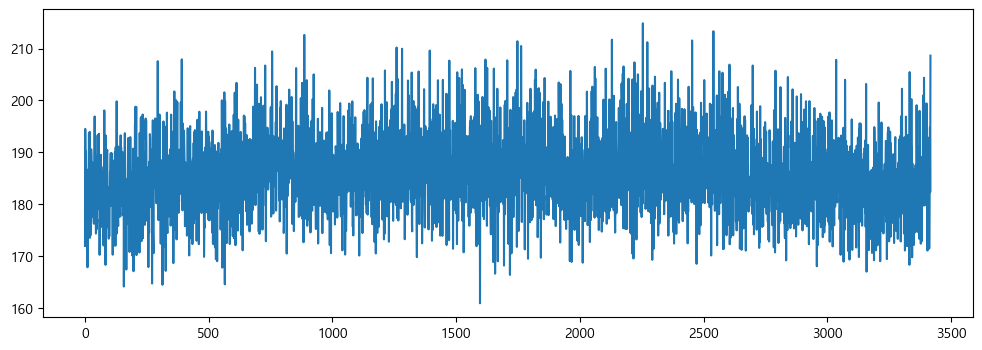

In [78]:
# CMPS Internal Sound
plt.figure(figsize=(12,4))
plt.plot(In_STD_df['Internal Sound'])
plt.show()

In [79]:
os.chdir(r'C:\Users\pjk98\Data\Tension\CMPS')
file_list = glob.glob("./*.csv", recursive=True)
print(file_list)

# for i in range(len(file_list)):
Tension_df = pd.read_csv(file_list[0], sep=',',header=0,encoding='CP949')
Tension_df.columns=['Time','Tension','이건 뭐징??']
drop_columns=['이건 뭐징??']
Tension_df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거
Tension_df['type'] = 'CMPS'
Tension_df


['.\\CMPS_23-05-31.csv']


,Time,Tension,type
0,[2023/05/31] 20:54:14,110.0,CMPS
1,[2023/05/31] 20:54:15,130.0,CMPS
2,[2023/05/31] 20:54:16,104.0,CMPS
3,[2023/05/31] 20:54:17,107.0,CMPS
4,[2023/05/31] 20:54:18,115.0,CMPS
...,...,...,...
3595,[2023/05/31] 21:54:09,98.0,CMPS
3596,[2023/05/31] 21:54:10,100.0,CMPS
3597,[2023/05/31] 21:54:11,97.0,CMPS
3598,[2023/05/31] 21:54:12,115.0,CMPS


In [80]:
Tension_df['Time'] = Tension_df['Time'].str.replace(r'\[|\]', '')
Tension_df['Time'] = Tension_df['Time'].str.replace(r'\/', '-')
Tension_df['Time'] = pd.to_datetime(Tension_df['Time'])
Tension_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     3600 non-null   datetime64[ns]
 1   Tension  3600 non-null   float64       
 2   type     3600 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 84.5+ KB


C:\Users\pjk98\AppData\Local\Temp\ipykernel_16792\2738122520.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Tension_df['Time'] = Tension_df['Time'].str.replace(r'\[|\]', '')
C:\Users\pjk98\AppData\Local\Temp\ipykernel_16792\2738122520.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Tension_df['Time'] = Tension_df['Time'].str.replace(r'\/', '-')


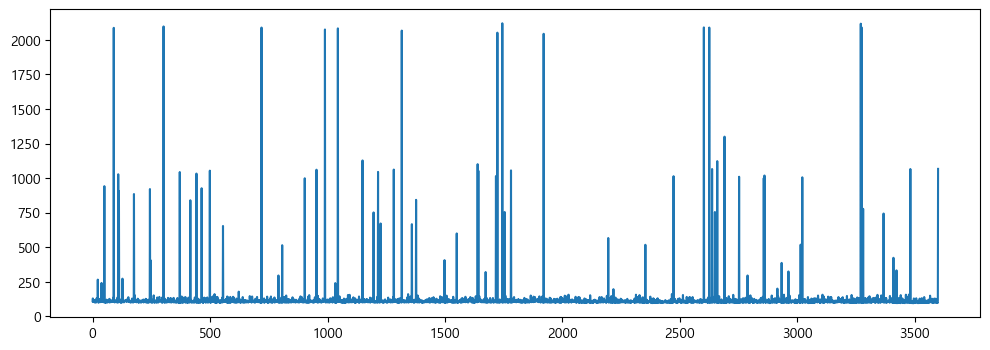

In [81]:
# CMPS Tension
plt.figure(figsize=(12,4))
plt.plot(Tension_df.Tension)
plt.show()

In [82]:
# 3개의 데이터프레임 병합
CMPS = pd.merge(Tension_df, Ex_PEAK_df, on='Time')
CMPS = pd.merge(CMPS, In_STD_df, on='Time')
# new_order = ['Time', 'Tension', 'External Sound', 'type']
new_order = ['Time','Tension','Internal Sound', 'External Sound', 'type']
CMPS = CMPS.reindex(columns=new_order)
CMPS['type'] = 'CMPS'

print(CMPS)

                    Time  Tension  Internal Sound  External Sound  type
0    2023-05-31 20:54:14    110.0      184.677009      515.808843  CMPS
1    2023-05-31 20:54:15    130.0      193.637996      513.835488  CMPS
2    2023-05-31 20:54:16    104.0      181.079010      517.171949  CMPS
3    2023-05-31 20:54:17    107.0      181.373234      514.414046  CMPS
4    2023-05-31 20:54:18    115.0      193.944048      515.694117  CMPS
...                  ...      ...             ...             ...   ...
3324 2023-05-31 21:53:55    103.0      184.958440      517.911070  CMPS
3325 2023-05-31 21:53:56    108.0      189.625532      521.914245  CMPS
3326 2023-05-31 21:53:57    129.0      199.432817      516.088639  CMPS
3327 2023-05-31 21:53:58    106.0      179.735581      519.356913  CMPS
3328 2023-05-31 21:53:59     99.0      180.790314      516.265909  CMPS

[3329 rows x 5 columns]


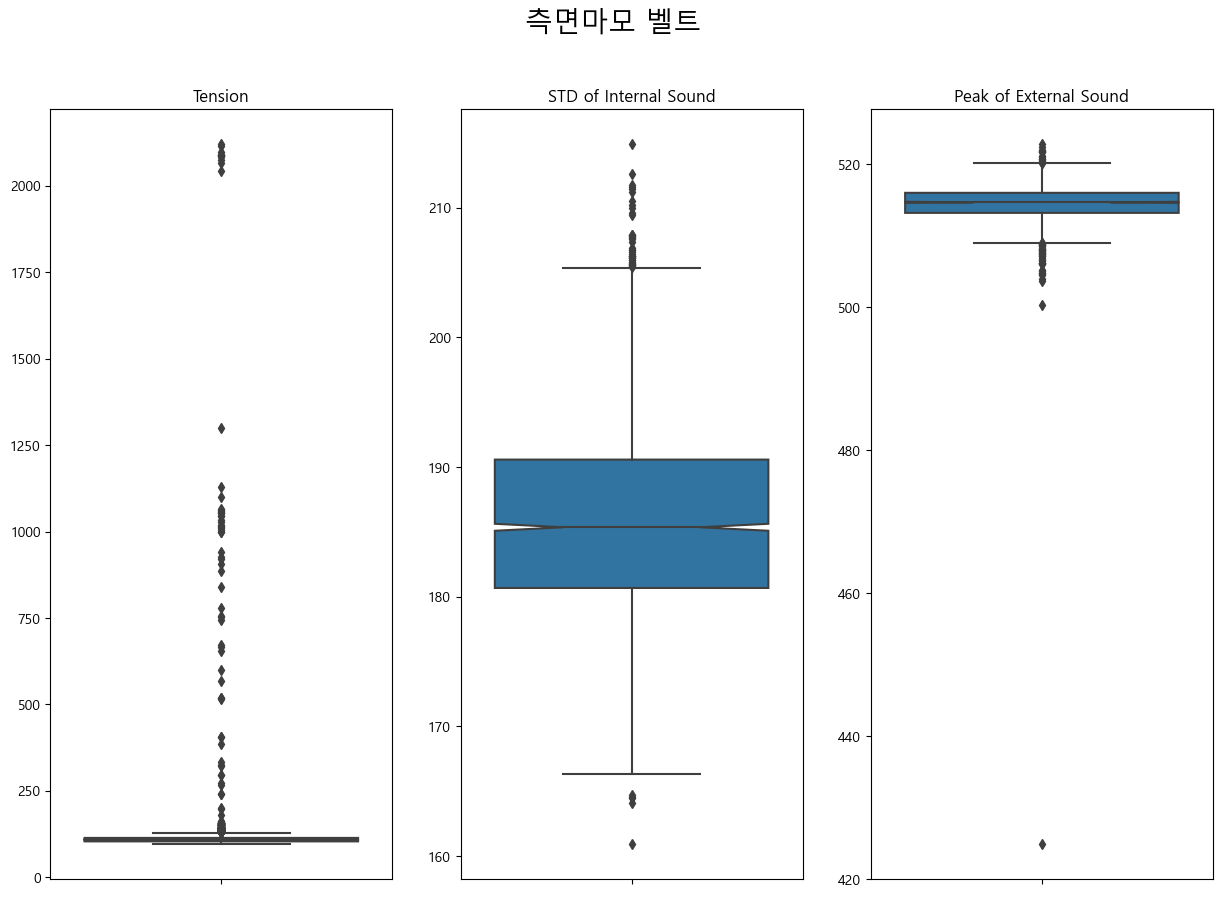

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

sns.boxplot(data=CMPS['Tension'], ax=axes[0], notch=True)
sns.boxplot(data=CMPS['Internal Sound'], ax=axes[1], notch=True)
sns.boxplot(data=CMPS['External Sound'], ax=axes[2], notch=True)

axes[0].set_title("Tension")
axes[1].set_title("STD of Internal Sound")
axes[2].set_title("Peak of External Sound")

axes[0].set_xticklabels([''])
axes[1].set_xticklabels([''])
axes[2].set_xticklabels([''])

plt.suptitle('측면마모 벨트', fontsize=20)

plt.show()

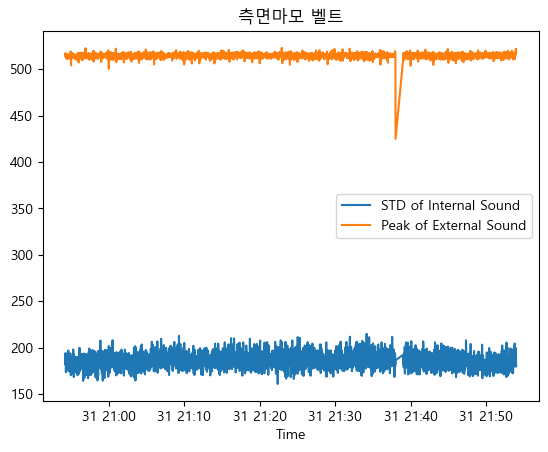

In [92]:
x = CMPS['Time']
y1 = CMPS['Internal Sound']
y2 = CMPS['External Sound']
plt.plot(x, y1, label='STD of Internal Sound')
plt.plot(x, y2, label='Peak of External Sound')

# 그래프 제목, 축 라벨 설정
plt.title('측면마모 벨트')
plt.xlabel('Time')
plt.ylabel('')

plt.legend()
plt.show()

# 주의
## 이후 코드들은 각 고장 유형별 데이터들을 병합한 이후 사용되는 코드 입니다.

# CMPS, JS, SSJD, SSNC --> 고장 유형별 데이터 프레임이다.
# 가장 적은 행을 가진 데이터프레임과 행의 길이 찾기
min_length = min(len(CMPS), len(JS), len(SSJD), len(SSNC))
df_list = [CMPS, JS, SSJD, SSNC]
min_df = df_list[0]
for df in df_list[1:]:
    if len(df) < len(min_df):
        min_df = df

print("가장 적은 행을 가진 데이터프레임:")
print(min_df)
print("행의 길이:")
print(len(min_df))

# 가장 적은 행의 길이를 기준으로 행 제거(원본 데이터 변경하는 코드) 주의해서 사용할 것!!!!!    
# for df in df_list:
#     df.drop(df.index[min_length:], inplace=True)
# print("행 제거 후 결과:")
# print(CMPS)
# print(JS)
# print(SSJD)
# print(SSNC)

# join() 메소드를 활용하여 데이터프레임을 합칠 수는 있으나 인덱스값이 중복되면 불가능해지기 때문에 이런 코드를 작성하였습니다.

Final_df = pd.DataFrame()

for df in [CMPS, JS, SSJD, SSNC]:
    # 데이터프레임을 행 방향으로 추가
    Final_df = Final_df.append(df, ignore_index=True) # ignore_index=True는 '인덱스 재설정' 파라미터 입니다.

print(Final_df)